<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/ML-decision-trees-and-random-forests/decision_trees/classification/06_niedouczenie_vs_przeuczenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

## Niedouczenie i Przeuczenie

### Import bibliotek

In [ ]:
print("#############################################")
print("Etap6. Odcinek1: Przykład modelu niedouczonego i przeuczonego.")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
sns.set(style='darkgrid')

#############################################
Etap6. Odcinek1: Przykład modelu niedouczonego i przeuczonego.


### Wygenerowanie danych

In [ ]:
print("raw_data jest krotką złożoną z dwóch tablic numpy")
raw_data = make_moons(n_samples=700, noise=0.25)
print(raw_data)
print("Typ raw_data", type(raw_data))

print()
print("Rozdziela te dwie tablice.")
print("Pierwsza tablica zwraca współrzędne x,y.")
data = raw_data[0]
print("Rozmiar danych", data.shape)
print("Druga tablica zwraca nazwę klasy.")
target = raw_data[1]
print("Rozmiar klas", target.shape)

data[:5]

raw_data jest krotką złożoną z dwóch tablic numpy
(array([[-1.02852538, -0.02068311],
       [ 0.51417861,  0.29429689],
       [-0.93164022,  0.3632444 ],
       ...,
       [ 0.29818477,  1.14305653],
       [-0.98442488,  0.56140559],
       [ 1.76157208,  0.00578955]]), array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1

array([[-1.02852538, -0.02068311],
       [ 0.51417861,  0.29429689],
       [-0.93164022,  0.3632444 ],
       [ 0.66962642,  0.93103535],
       [ 1.42293368, -0.06368987]])

In [ ]:
target[:5]

array([0, 1, 0, 0, 1])

### Wizualizacja danych

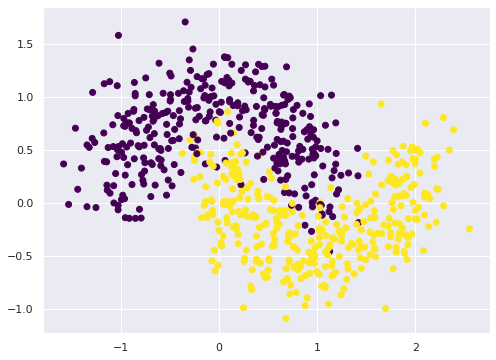

In [ ]:
plt.figure(figsize=(8, 6))
# c daje trzeci wymiar dający przynależność do klasy
# cmap po to żeby były ładniejsze kolory bo domyślnie jasno-żółty i czarny
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')

### Podział na zbiór treningowy i testowy

In [ ]:
from sklearn.model_selection import train_test_split

# domyślnie zbiór testowy zajmuje 25%
# parametr stratify robi równy podział klas
X_train, X_test, y_train, y_test = train_test_split(data, target)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (525, 2)
X_test shape: (175, 2)
y_train shape: (525,)
y_test shape: (175,)


### Wizualizacja zbioru treningowego i testowego

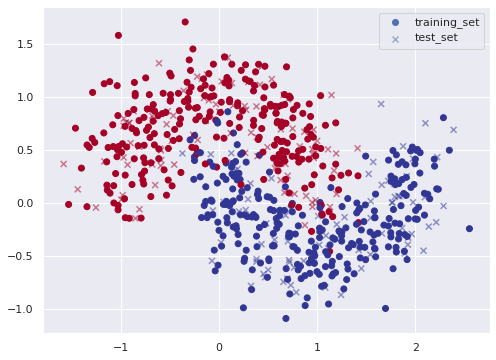

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.legend()

### Niedouczenie - Regresja Logistyczna (tak naprawdę klasyfikacja)

#############################################
Etap6. Odcinek2: Przykład modelu niedouczonego i przeuczonego cz2.
Linia to granica decyzyjna.


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Dokładność na zbiorze treningowym: 0.878095')

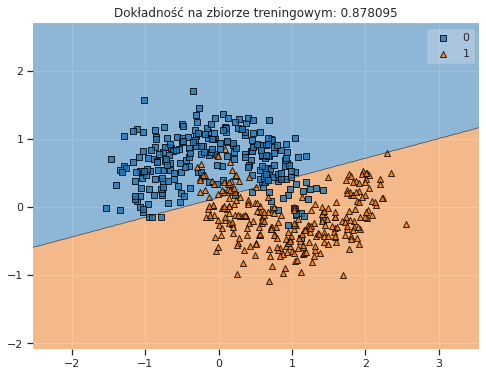

In [ ]:
print("#############################################")
print("Etap6. Odcinek2: Przykład modelu niedouczonego i przeuczonego cz2.")

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
 
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, log_reg)
print("Linia to granica decyzyjna.")
plt.title('Dokładność na zbiorze treningowym: {:4f}'.format(log_reg.score(X_train, y_train)))

### Zbiór testowy

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Dokładność na zbiorze testowym: 0.868571')

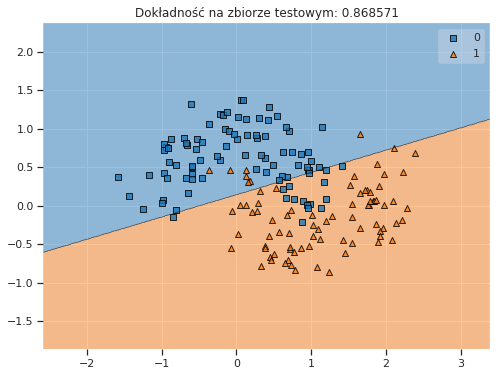

In [ ]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, log_reg)
plt.title('Dokładność na zbiorze testowym: {:4f}'.format(log_reg.score(X_test, y_test)))

### Niedouczenie - Drzewa Decyzyjne

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Dokładność na zbiorze treningowym: 0.841905')

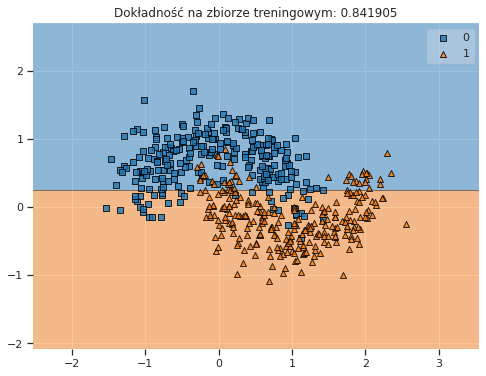

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, tree_clf)
plt.title('Dokładność na zbiorze treningowym: {:4f}'.format(tree_clf.score(X_train, y_train)))

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Dokładność na zbiorze testowym: 0.822857')

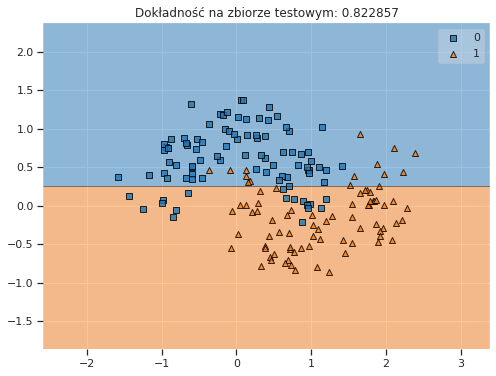

In [ ]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, tree_clf)
plt.title('Dokładność na zbiorze testowym: {:4f}'.format(tree_clf.score(X_test, y_test)))

### Przykład przeuczenia

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Dokładność na zbiorze treningowym: 1.000000')

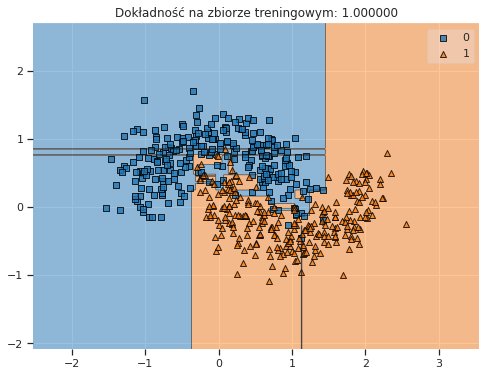

In [ ]:
# nie ma max_depth więc uczy się do końca
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, tree_clf)
plt.title('Dokładność na zbiorze treningowym: {:4f}'.format(tree_clf.score(X_train, y_train)))

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Dokładność na zbiorze testowym: 0.931429')

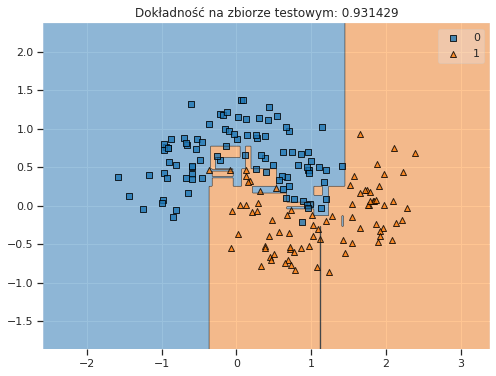

In [ ]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, tree_clf)
plt.title('Dokładność na zbiorze testowym: {:4f}'.format(tree_clf.score(X_test, y_test)))

### Wybór optymalnych hiperparametrów - Grid Search

In [ ]:
print("#############################################")
print("Etap6. Odcinek3: Wybór optymalnego modelu dzięki metodzie przeszukiwania siatki (Grid Search)")

import numpy as np
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

# siatka parametrów do naszego grid_search
# min_samples_leaf to minimalna liczba próbek na liściu
params = {'max_depth': np.arange(1, 10),
         'min_samples_leaf': [1, 5, 10, 15, 20]}

# chcę zmaksymalizować accuracy. Estymatorem jest tree. Optymalizuje wzgl dokładności.
# n_jobs to ilość użytych rdzeni procesora (-1 to wszystkie)
grid_search = GridSearchCV(tree, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5)

#############################################
Etap6. Odcinek3: Wybór optymalnego modelu dzięki metodzie przeszukiwania siatki (Grid Search)


In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
      

In [ ]:
# atrybut obiektu grid_search
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Dokładność na zbiorze treningowym: 0.954286')

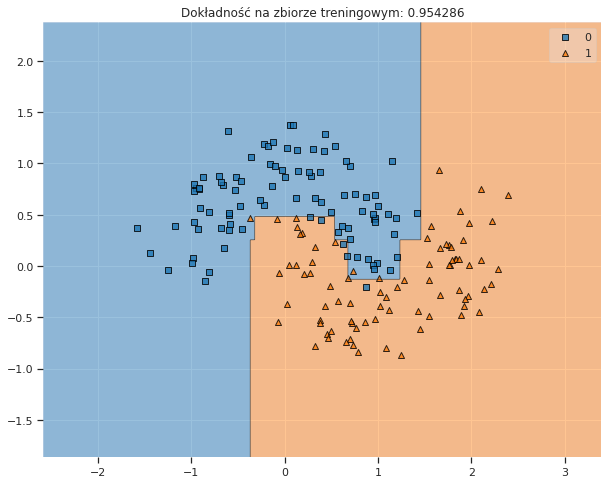

In [ ]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title('Dokładność na zbiorze treningowym: {:4f}'.format(grid_search.score(X_train, y_train)))

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Dokładność na zbiorze testowym: 0.948571')

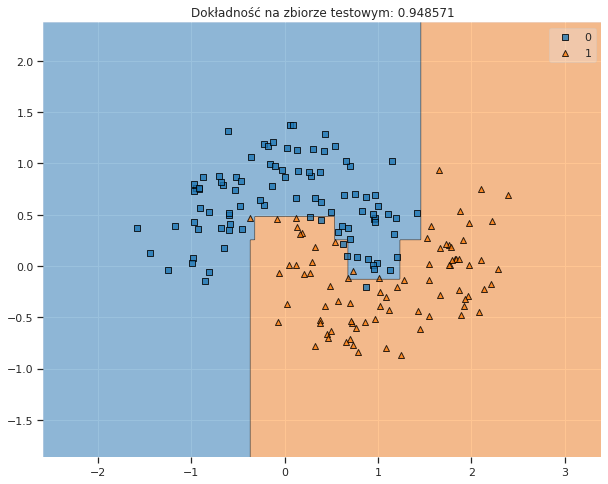

In [ ]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title('Dokładność na zbiorze testowym: {:4f}'.format(grid_search.score(X_test, y_test)))